In [1]:
import os
import sys

os.chdir('..')


In [2]:
!pwd

/Users/alexc/Desktop/UofG/Lvl5-Project/test-suite-enhancement


# Helper scripts

In [3]:
import json

# Print out all the user prompts stored in task json
task_json_path = "data/batch_requests/batch_task_jsons/batch_tasks_100.jsonl"
with open(task_json_path, 'r') as f:
    task_jsonl = f.read()
tasks = task_jsonl.split('\n')
for task in tasks:
    if not task.strip():
        continue
    task_json = json.loads(task)
    prompts = task_json['body']['messages']
    user_prompt = next((msg['content'] for msg in prompts if msg['role'] == 'user'), None)
    print(user_prompt)


# CLASS UNDER TEST: HumanEval_99.py

def closest_integer(value):
    '''
    Create a function that takes a value (string) representing a number
    and returns the closest integer to it. If the number is equidistant
    from two integers, round it away from zero.

    Examples
    >>> closest_integer("10")
    10
    >>> closest_integer("15.3")
    15

    Note:
    Rounding away from zero means that if the given number is equidistant
    from two integers, the one you should return is the one that is the
    farthest from zero. For example closest_integer("14.5") should
    return 15 and closest_integer("-14.5") should return -15.
    '''

    from math import floor, ceil

    if value.count('.') == 1:
        # remove trailing zeros
        while (value[-1] == '0'):
            value = value[:-1]

    num = float(value)
    if value[-2:] == '.5':
        if num > 0:
            res = ceil(num)
        else:
            res = floor(num)
    elif len(value) > 0:
        res = int(rou

In [4]:
# Add a identifier value to all the batches
BATCHES_JSON = 'data/batch_requests/batch_requests.jsonl'
def add_identifier(json_path, key, value):
    with open(json_path, 'r') as f:
        task_jsonl = f.read()
    tasks = task_jsonl.split('\n')
    for i, task in enumerate(tasks):
        if not task.strip():
            continue
        task_json = json.loads(task)
        task_json['identifiers'][key] = value
        tasks[i] = json.dumps(task_json)

    with open(json_path, 'w') as f:
        f.write('\n'.join(tasks))

# add_identifier(BATCHES_JSON, 'flag', 'old_1')


In [5]:
from src.evaluation_entry import EvaluationEntry

def add_identifier_to_eval_entries():
    # Add an identifier to all the eval entries whose batch has the flag 'old_1'
    eval_entries = EvaluationEntry.load_all("enhanced", "human_eval")
    for eval_entry in eval_entries:
        print(eval_entry.eval_id)
        print(eval_entry.type)
        # eval_entry.save()
    
# add_identifier_to_eval_entries()


In [6]:
from src.evaluation_entry import EvaluationEntry

# Update the enhanced metrics from string to json
def convert_enhanced_entry_metrics():
    eval_entries = EvaluationEntry.load_all("enhanced", "human_eval")
    for eval_entry in eval_entries:
        if type(eval_entry.eval_data["enhanced_project_evaluation"]) == str:
            try:
                eval_entry.eval_data["enhanced_project_evaluation"] = json.loads(eval_entry.eval_data["enhanced_project_evaluation"])
                eval_entry.eval_data["enhanced_test_evaluation"] = json.loads(eval_entry.eval_data["enhanced_test_evaluation"])
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON for eval entry {eval_entry.eval_id}: {e}")
                continue
            # eval_entry.save()
    
# convert_enhanced_entry_metrics()

In [7]:
# Remove tha task_path from all the new batches
BATCHES_JSON = 'data/batch_requests/batch_requests.jsonl'
def remove_task_path(json_path):
    with open(json_path, 'r') as f:
        task_jsonl = f.read()
    tasks = task_jsonl.split('\n')
    for i, task in enumerate(tasks):
        if not task.strip():
            continue
        
        task_json = json.loads(task)
        # print(task_json["batch_id"])
        identifiers = task_json['identifiers']
        if 'flag' in identifiers and identifiers['flag'] == 'old_1':
            continue
        
        task_json['task_json'] = None
        tasks[i] = json.dumps(task_json)

    with open(json_path, 'w') as f:
        f.write('\n'.join(tasks))

# remove_task_path(BATCHES_JSON)

# Evaluation

1. Create a chart/table for correctness metrics
2. Create a chart/table for coverage metrics
3. Create a chart/table for code quality metrics

In [9]:
# Transform the task_json to csv
import pandas as pd
from IPython.display import display

def get_initial_eval_entry_csv(project_name):
    eval_entries = EvaluationEntry.load_all("initial", project_name)
    data = []

    for eval_entry in eval_entries:
        eval_entry_data = eval_entry.get_eval_entry_csv()
        data.append(eval_entry_data)
    
    init_dfs = pd.concat(data, ignore_index=True)
    display(init_dfs)
    return init_dfs

df = get_initial_eval_entry_csv('human_eval')


{'eval_id': '0_pynguin', 'test_source': 'pynguin', 'total_classes': 164, 'total_tests': 515, 'passed': 211, 'passed_after_repair': 210, 'syntax_errors': 0, 'syntax_errors_after_repair': 0, 'compilation_errors': 0, 'compilation_errors_after_repair': 0, 'no_test_classes_after_repair': 37, 'rule_1_repair_count': 515, 'rule_2_repair_count': 0, 'rule_3_repair_count': 2, 'rule_3_repaired_tests': 'test_HumanEval_22.py;test_HumanEval_29.py', 'rule_4_repair_count': 5, 'rule_4_repaired_tests': 'test_HumanEval_128.py;test_HumanEval_75.py;test_HumanEval_122.py;test_HumanEval_22.py;test_HumanEval_29.py', 'rule_5_repair_count': 0, 'rule_5_repaired_tests': '', 'rule_6_repair_count': 0, 'rule_6_repaired_tests': '', 'rule_7_repair_count': 0, 'rule_7_repaired_tests': '', 'rule_8_repair_count': 0, 'rule_8_repaired_tests': '', 'coverage': '83.5', 'branch_coverage': '64.0', 'line_coverage': '88.0', 'lines_to_cover': '2696', 'uncovered_lines': '324', 'lines': '2547', 'non_comment_lines': '1526', 'comment_li

,eval_id,test_source,total_classes,total_tests,passed,passed_after_repair,syntax_errors,syntax_errors_after_repair,compilation_errors,compilation_errors_after_repair,...,cognitive_complexity,cyclomatic_complexity,squale_index,code_smells,bugs,vulnerabilities,syntactically_correct,syntactically_correct_after_repair,compilable,compilable_after_repair
0,0_pynguin,pynguin,164,515,211,210,0,0,0,0,...,0,211,1106,185,0,0,164,164,164,164
1,1_chatgpt,chatgpt,164,1170,0,969,0,0,1,0,...,0,969,164,25,25,0,164,164,163,164
2,2_human_written,human_written,164,1181,1172,1172,0,0,0,0,...,2,1175,796,103,12,0,164,164,164,164


## Correctness evaluation

In [10]:
def create_correctness_table(df):
    correctness_cols = [
        'total_tests',
        'total_classes',
        'syntactically_correct',
        'syntactically_correct_after_repair',
        'compilable',
        'compilable_after_repair',
        'passed',
        'passed_after_repair',
        # 'no_test_classes_after_repair'
    ]

    # Create correctness table
    melted = df.melt(
        id_vars=['test_source'],
        value_vars=correctness_cols,
        var_name='metric',
        value_name='value'
    )
    correctness_table = melted.pivot(index='metric', columns='test_source', values='value').fillna(0).astype(int)
    correctness_table = correctness_table.reindex(correctness_cols)
    # Sort the table by the order of correctness_cols
    

    # Create percentage table
    percentage_table = correctness_table.copy().astype(float)

    for col in percentage_table.columns:
        total_tests = percentage_table.loc['total_tests', col]
        total_classes = percentage_table.loc['total_classes', col]
        for idx in percentage_table.index:
            if idx != 'total_tests' and idx != 'total_classes':
                if idx in ['passed', 'passed_after_repair']:
                    total = total_tests
                else:
                    total = total_classes
                percentage_table.loc[idx, col] = (percentage_table.loc[idx, col] / total * 100) if total > 0 else 0.0
            else:
                percentage_table.loc[idx, col] = None  # No % for total_classes

    # Format values
    percentage_table = percentage_table.applymap(
        lambda x: f"{x:.2f}%" if pd.notna(x) else ""
    )
    correctness_table = correctness_table.astype(str)
    percentage_table.index = [f"{i} (%)" if i != 'total_tests' else '' for i in correctness_table.index]

    # Combine both tables
    combined_table = pd.concat([correctness_table, percentage_table])
    combined_table = combined_table[combined_table.index != '']

    # Display
    print(combined_table)
    

create_correctness_table(df)

test_source                             chatgpt human_written  pynguin
total_tests                                1170          1181      515
total_classes                               164           164      164
syntactically_correct                       164           164      164
syntactically_correct_after_repair          164           164      164
compilable                                  163           164      164
compilable_after_repair                     164           164      164
passed                                        0          1172      211
passed_after_repair                         969          1172      210
total_classes (%)                                                     
syntactically_correct (%)               100.00%       100.00%  100.00%
syntactically_correct_after_repair (%)  100.00%       100.00%  100.00%
compilable (%)                           99.39%       100.00%  100.00%
compilable_after_repair (%)             100.00%       100.00%  100.00%
passed

/var/folders/z7/grqfp40j73xcvr_rkz8n20hm0000gn/T/ipykernel_58276/334560278.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  percentage_table = percentage_table.applymap(


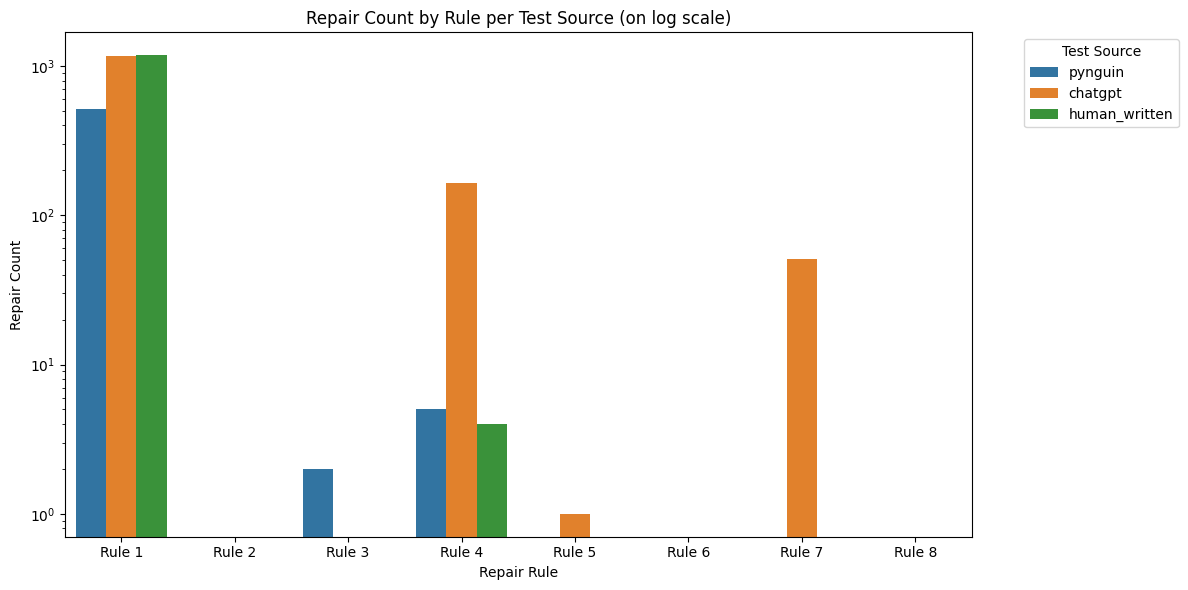

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_rule_repair_figure(df:pd.DataFrame):
    repair_cols = [col for col in df.columns if col.endswith('_repair_count') and col.startswith('rule_')]

    melted_df = df.melt(
        id_vars=['test_source'],
        value_vars=repair_cols,
        var_name='rule',
        value_name='repair_count'
    )
    melted_df['rule'] = melted_df['rule'].str.replace('_repair_count', '').str.replace('rule_', 'Rule ')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='rule', y='repair_count', hue='test_source')

    plt.yscale('log') # Use log scale to better visualize the differences

    plt.title('Repair Count by Rule per Test Source (on log scale)')
    plt.xlabel('Repair Rule')
    plt.ylabel('Repair Count')
    plt.legend(title='Test Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

create_rule_repair_figure(df)

In [12]:
def create_rule_repair_table(df):
    repair_cols = [col for col in df.columns if col.endswith('_repair_count') and col.startswith('rule_')]

    melted_df = df.melt(
        id_vars=['test_source'],
        value_vars=repair_cols,
        var_name='rule',
        value_name='repair_count'
    )
    
    table_df = melted_df.pivot(index='rule', columns='test_source', values='repair_count')
    table_df = table_df.fillna(0).astype(int)

    print(table_df)

create_rule_repair_table(df)

test_source          chatgpt  human_written  pynguin
rule                                                
rule_1_repair_count     1170           1181      515
rule_2_repair_count        0              0        0
rule_3_repair_count        0              0        2
rule_4_repair_count      164              4        5
rule_5_repair_count        1              0        0
rule_6_repair_count        0              0        0
rule_7_repair_count       51              0        0
rule_8_repair_count        0              0        0


## Coverage evaluation

In [13]:
# Coverage metrics

def create_coverage_table(df):
    coverage_cols = [
        ''
    ]

    # Create correctness table
    melted = df.melt(
        id_vars=['test_source'],
        value_vars=coverage_cols,
        var_name='metric',
        value_name='value'
    )
    coverage_table = melted.pivot(index='metric', columns='test_source', values='value').fillna(0).astype(int)
    coverage_table = coverage_table.reindex(coverage_cols)
    # Sort the table by the order of coverage_cols

    # Format values
    percentage_table = percentage_table.applymap(
        lambda x: f"{x:.2f}%" if pd.notna(x) else ""
    )
    coverage_table = coverage_table.astype(str)
    percentage_table.index = [f"{i} (%)" if i != 'total_tests' else '' for i in coverage_table.index]

    # Combine both tables
    combined_table = pd.concat([coverage_table, percentage_table])
    combined_table = combined_table[combined_table.index != '']

    # Display
    print(combined_table)